# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation



In [19]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv("api.env")

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [5]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [9]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19020806,
            "id": 1,
            "last_updated": 1650802090,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 753969967716,
                    "percent_change_1h": -0.359641785537767,
                    "percent_change_24h": 0.159183282421814,
                    "percent_change_7d": -2.04731584948292,
                    "percentage_change_1h": -0.359641785537767,
                    "percentage_change_24h": 0.159183282421814,
                    "percentage_change_7d": -2.04731584948292,
                    "price": 39622.0,
                    "volume_24h": 13978799954
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19020806,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [10]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120508442,
            "id": 1027,
            "last_updated": 1650802118,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 354467717190,
                    "percent_change_1h": -0.353660726893999,
                    "percent_change_24h": -0.518044654280516,
                    "percent_change_7d": -4.0858241454665,
                    "percentage_change_1h": -0.353660726893999,
                    "percentage_change_24h": -0.518044654280516,
                    "percentage_change_7d": -4.0858241454665,
                    "price": 2941.07,
                    "volume_24h": 7625293616
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120508442,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocur

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [15]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]['1']['quotes']['USD']['price']
print(f" current Bitcoin price: {btc_price}")


 current Bitcoin price: 39622.0


In [17]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]['1027']['quotes']['USD']['price']
print(f" current Ethereum price: {eth_price}")

 current Ethereum price: 2941.07


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [53]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
# YOUR CODE HERE
btc_value

47546.4

In [54]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
# YOUR CODE HERE
eth_value

15587.671

In [55]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
total_crypto_wallet

63134.071

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [43]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [44]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [56]:
start_date = pd.Timestamp("2022-04-03", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-24", tz="America/New_York").isoformat()
timeframe = "1Day"
tickers = ["AGG", "SPY"]


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [57]:
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


df_portfolio

,symbol,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,,
2022-04-04 04:00:00+00:00,AGG,106.84,106.8700,106.5600,32544,106.87,9956493,106.739298
2022-04-05 04:00:00+00:00,AGG,105.76,106.6250,105.7400,34684,106.60,11018430,105.931526
2022-04-06 04:00:00+00:00,AGG,105.49,105.8050,105.1150,47090,105.20,13322630,105.463015
2022-04-07 04:00:00+00:00,AGG,105.26,105.5100,105.1300,25631,105.38,7921117,105.278761
2022-04-08 04:00:00+00:00,AGG,104.73,105.0100,104.6150,24900,104.82,6501822,104.804999
2022-04-11 04:00:00+00:00,AGG,104.28,104.5050,104.1700,29767,104.44,8377902,104.312835
2022-04-12 04:00:00+00:00,AGG,104.61,104.9200,104.5800,29955,104.83,8448652,104.740856
2022-04-13 04:00:00+00:00,AGG,104.82,105.0900,104.7400,27348,104.77,6868550,104.889799
2022-04-14 04:00:00+00:00,AGG,103.97,104.7400,103.9300,30443,104.73,8505987,104.171733


#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [59]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)


agg_close_price = agg["close"]

# # Print the AGG closing price
# # YOUR CODE HERE
agg_close_price.mean()



104.42999999999999

In [60]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
spy_close_price = spy["close"]

# Print the SPY closing price
# YOUR CODE HERE
spy_close_price.mean()

442.9871428571429

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [62]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price.mean() * agg_shares

# Print the current value of the bond portfolio
# YOUR CODE HERE
agg_value

20886.0

In [63]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price.mean() * spy_shares

# Print the current value of the stock portfolio
# YOUR CODE HERE
spy_value

48728.58571428572

In [64]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
total_stocks_bonds

69614.58571428573

In [65]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
total_portfolio

132748.65671428572

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [66]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
# YOUR CODE HERE
savings_data

[63134.071, 69614.58571428573]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [68]:
savings_df = pd.DataFrame({'amount':savings_data}, index=["crypto", "stock/bond"])

# Display the savings_df DataFrame
# YOUR CODE HERE
savings_df

,amount
crypto,63134.071000
stock/bond,69614.585714


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

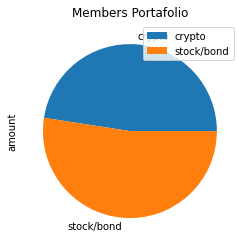

In [70]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
savings_df.plot.pie(title="Members Portafolio", y="amount")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [71]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fun_value = monthly_income * 3
emergency_fun_value


36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [72]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fun_value:
    print("Congratulating the member for having enough money in this fund")
elif total_portfolio == emergency_fun_value:
    print("Congratulating the member on reaching this important financial goal")
else:
    print(f"How many dollars away the member is from reaching the goal: {emergency_fun_value - total_portfolio}")



Congratulating the member for having enough money in this fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [76]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2019-04-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-24", tz="America/New_York").isoformat()
# Set number of rows to 1000 to retrieve the maximum amount of rows
# YOUR CODE HERE

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    
    start = start_date,
    end = end_date
).df




agg = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
spy = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

prices_df = pd.concat([agg, spy], axis=1, keys=["AGG", "SPY"])

prices_df.head()

AGG                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2019-04-24 04:00:00+00:00  108.50  108.53  108.4200       10192  108.42   
2019-04-25 04:00:00+00:00  108.49  108.55  108.4200        9121  108.50   
2019-04-26 04:00:00+00:00  108.71  108.75  108.6600        8664  108.74   
2019-04-29 04:00:00+00:00  108.52  108.62  108.4900        8977  108.56   
2019-04-30 04:00:00+00:00  108.59  108.68  108.5135       17892  108.56   

                                                   SPY                    \
                            volume        vwap   close    high       low   
timestamp                                                                  
2019-04-24 04:00:00+00:00  3000163  108.496809  292.23  293.16  292.0700   
2019-04-25 04:00:00+00:00  2648150  108.473969  292.05  292.78  290.7300   
2019-04-26 04:00:00+00:00  2300074  108.705413  293.41  293.49  291.2401   
2019-04-29 04:00:00+00:00  2782634  108.539174  293.87  294.45  293.4100   
2019-04-30 04:00:00+00:00  7491505  108.620462  294.02  294.34  291.9200   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2019-04-24 04:00:00+00:00      203858  292.76  50469550  292.580824  
2019-04-25 04:00:00+00:00      238260  292.12  57875137  292.051720  
2019-04-26 04:00:00+00:00      220594  292.12  51449173  292.642502  
2019-04-29 04:00:00+00:00      186857  293.53  61675682  293.871519  
2019-04-30 04:00:00+00:00      254912  293.52  81411933  293.551590

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [86]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

MC_30year = MCSimulation(
    portfolio_data = prices_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

MC_30year.portfolio_data.head()

AGG                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2019-04-24 04:00:00+00:00  108.50  108.53  108.4200       10192  108.42   
2019-04-25 04:00:00+00:00  108.49  108.55  108.4200        9121  108.50   
2019-04-26 04:00:00+00:00  108.71  108.75  108.6600        8664  108.74   
2019-04-29 04:00:00+00:00  108.52  108.62  108.4900        8977  108.56   
2019-04-30 04:00:00+00:00  108.59  108.68  108.5135       17892  108.56   

                                                                SPY          \
                            volume        vwap daily_return   close    high   
timestamp                                                                     
2019-04-24 04:00:00+00:00  3000163  108.496809          NaN  292.23  293.16   
2019-04-25 04:00:00+00:00  2648150  108.473969    -0.000092  292.05  292.78   
2019-04-26 04:00:00+00:00  2300074  108.705413     0.002028  293.41  293.49   
2019-04-29 04:00:00+00:00  2782634  108.539174    -0.001748  293.87  294.45   
2019-04-30 04:00:00+00:00  7491505  108.620462     0.000645  294.02  294.34   

                                                                               \
                                low trade_count    open    volume        vwap   
timestamp                                                                       
2019-04-24 04:00:00+00:00  292.0700      203858  292.76  50469550  292.580824   
2019-04-25 04:00:00+00:00  290.7300      238260  292.12  57875137  292.051720   
2019-04-26 04:00:00+00:00  291.2401      220594  292.12  51449173  292.642502   
2019-04-29 04:00:00+00:00  293.4100      186857  293.53  61675682  293.871519   
2019-04-30 04:00:00+00:00  291.9200      254912  293.52  81411933  293.551590   

                                        
                          daily_return  
timestamp                               
2019-04-24 04:00:00+00:00          NaN  
2019-04-25 04:00:00+00:00    -0.000616  
2019-04-26 04:00:00+00:00     0.004657  
2019-04-29 04:00:00+00:00     0.001568  
2019-04-30 04:00:00+00:00     0.000510

In [87]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
MC_30year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985314,1.001869,1.004639,0.993718,1.008923,0.987732,1.000417,1.000617,0.984758,1.008082,...,1.001966,1.008539,1.013696,0.999580,1.005845,1.002234,1.009023,0.979388,0.994358,1.010981
2,0.984161,1.018067,1.005789,0.996955,1.014221,0.987262,1.000672,1.018256,0.986446,0.999028,...,1.016159,1.010634,1.024673,0.998858,1.015250,1.007289,1.001108,0.997486,0.996831,0.999836
3,0.981617,1.018479,1.001575,0.991633,1.028231,0.987724,1.004443,1.038123,0.979527,1.000924,...,1.018541,1.000096,1.024533,1.008417,1.001763,1.004216,0.994945,0.984979,0.992733,1.001043
4,0.971433,1.034763,1.004365,0.999435,1.020442,0.993125,1.011521,1.047733,0.969860,1.001322,...,1.016175,0.981217,1.011849,1.013048,1.018792,1.019985,1.021957,0.988385,1.002213,1.007196
5,0.969150,1.026224,1.000714,0.998846,1.025421,0.998154,1.002474,1.055594,0.975471,0.989628,...,1.002256,0.983118,1.019767,1.013761,1.009420,1.016795,1.007093,0.984044,0.983652,1.011750
6,0.969647,1.014545,1.002900,1.001636,1.006191,0.990320,0.992618,1.053648,0.976202,0.995246,...,0.996793,0.988255,1.018036,1.021164,1.003276,1.020866,1.013246,0.989375,0.985903,1.021719
7,0.966111,1.003278,1.018797,1.005308,0.993481,0.985847,1.002473,1.053789,0.969019,0.975022,...,0.990284,0.987371,1.004009,1.023193,1.017254,1.020184,1.015082,0.994647,0.965299,1.026009
8,0.970353,1.004872,1.018029,0.996142,0.992470,0.987541,1.008333,1.065094,0.963123,0.978727,...,0.993260,0.988045,1.005061,1.020860,1.016125,1.019489,1.012131,0.978495,0.969913,1.031074
9,0.980724,1.008038,1.015346,0.987667,1.001077,0.983713,1.019270,1.060783,0.967125,0.974893,...,0.993119,0.996204,0.999617,1.019873,1.020795,1.029764,1.024944,0.994346,0.964757,1.019959


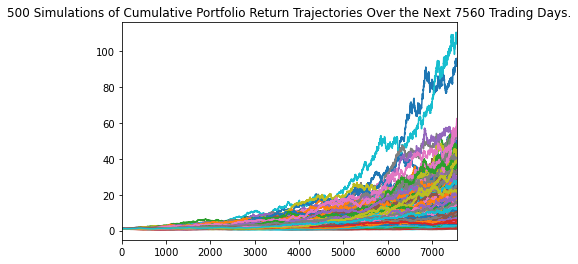

In [88]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_sim_line_plot = MC_30year.plot_simulation()
MC_sim_line_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

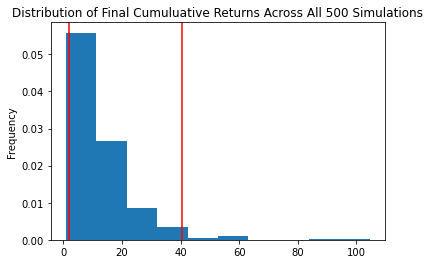

In [89]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
MC_sim_dist_plot = MC_30year.plot_distribution()
MC_sim_dist_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [101]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
MC_summary_statistics = MC_30year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
print(MC_summary_statistics)

count           500.000000
mean             12.791073
std              11.208599
min               0.829480
25%               5.732886
50%               9.460425
75%              16.397684
max             104.717698
95% CI Lower      1.955179
95% CI Upper     40.418942
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [82]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
total_stocks_bonds


69614.58571428573

In [102]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * total_stocks_bonds

# Print the result of your calculations
# YOUR CODE HERE
print(f"There is a 95% chance that an initial investment of {total_stocks_bonds} in the portfolio"
    f" over the next 30 years will end within in the range of"
    f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")

There is a 95% chance that an initial investment of 69614.58571428573 in the portfolio over the next 30 years will end within in the range of $ 136109.00 and $ 2813747.87.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [92]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_10year = MCSimulation(
    portfolio_data = prices_df,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_10year.portfolio_data.head()

# Review the simulation input data
# YOUR CODE HERE


AGG                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2019-04-24 04:00:00+00:00  108.50  108.53  108.4200       10192  108.42   
2019-04-25 04:00:00+00:00  108.49  108.55  108.4200        9121  108.50   
2019-04-26 04:00:00+00:00  108.71  108.75  108.6600        8664  108.74   
2019-04-29 04:00:00+00:00  108.52  108.62  108.4900        8977  108.56   
2019-04-30 04:00:00+00:00  108.59  108.68  108.5135       17892  108.56   

                                                                SPY          \
                            volume        vwap daily_return   close    high   
timestamp                                                                     
2019-04-24 04:00:00+00:00  3000163  108.496809          NaN  292.23  293.16   
2019-04-25 04:00:00+00:00  2648150  108.473969    -0.000092  292.05  292.78   
2019-04-26 04:00:00+00:00  2300074  108.705413     0.002028  293.41  293.49   
2019-04-29 04:00:00+00:00  2782634  108.539174    -0.001748  293.87  294.45   
2019-04-30 04:00:00+00:00  7491505  108.620462     0.000645  294.02  294.34   

                                                                               \
                                low trade_count    open    volume        vwap   
timestamp                                                                       
2019-04-24 04:00:00+00:00  292.0700      203858  292.76  50469550  292.580824   
2019-04-25 04:00:00+00:00  290.7300      238260  292.12  57875137  292.051720   
2019-04-26 04:00:00+00:00  291.2401      220594  292.12  51449173  292.642502   
2019-04-29 04:00:00+00:00  293.4100      186857  293.53  61675682  293.871519   
2019-04-30 04:00:00+00:00  291.9200      254912  293.52  81411933  293.551590   

                                        
                          daily_return  
timestamp                               
2019-04-24 04:00:00+00:00          NaN  
2019-04-25 04:00:00+00:00    -0.000616  
2019-04-26 04:00:00+00:00     0.004657  
2019-04-29 04:00:00+00:00     0.001568  
2019-04-30 04:00:00+00:00     0.000510

In [93]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009292,0.990884,0.986516,0.983392,1.015669,0.990336,0.980153,1.005636,0.987994,0.993631,...,0.997882,1.008245,1.002360,1.007342,1.004558,0.981133,1.013087,1.013504,0.997067,1.007281
2,1.012810,0.993939,0.977830,0.992234,1.024899,0.997138,0.995476,1.013907,1.006649,1.007958,...,0.967908,1.007707,1.011130,1.025088,1.009269,0.986163,0.999037,1.020741,0.994703,0.993487
3,1.016958,1.001907,0.964638,0.989115,1.025712,1.016679,0.981520,0.994832,1.017515,0.996757,...,0.969431,1.019905,0.994713,1.026061,1.000164,0.981317,1.013281,1.026010,1.007815,0.988258
4,1.014204,0.980279,0.983705,0.998448,1.024100,1.027781,0.986573,0.987693,1.025120,1.001995,...,0.978761,1.042126,1.009623,1.010652,0.990765,0.998177,1.015154,1.034151,1.004720,0.986120
5,1.009942,0.973279,0.989267,0.996778,1.016356,1.032194,0.982121,0.988620,1.024628,0.995016,...,0.967270,1.054402,0.986467,1.016522,0.998944,0.998375,1.022705,1.022518,1.034304,0.985730
6,1.017747,0.970422,0.989347,0.975122,1.021155,1.022871,0.982270,1.004973,1.017830,0.982887,...,0.957568,1.037235,0.985752,1.013414,0.998682,1.008610,1.019517,1.019890,1.030683,0.988952
7,1.015586,0.979223,0.991840,0.973971,1.018722,1.025842,0.982005,0.996173,1.017863,0.988227,...,0.945587,1.043729,0.981249,1.002618,1.010833,1.024890,1.031063,1.022703,1.024928,0.979703
8,1.031221,0.963281,0.990205,0.982587,1.015806,1.024280,0.992314,0.987859,1.011500,0.988105,...,0.938139,1.083659,0.967471,0.985562,1.003631,1.047036,1.025551,1.025693,1.021359,0.974478
9,1.048696,0.940719,0.981547,0.973384,1.010323,1.033534,0.992107,0.993264,1.003373,0.969381,...,0.949258,1.085296,0.976046,0.975515,1.011512,1.043417,1.026082,1.029670,1.025204,0.980412


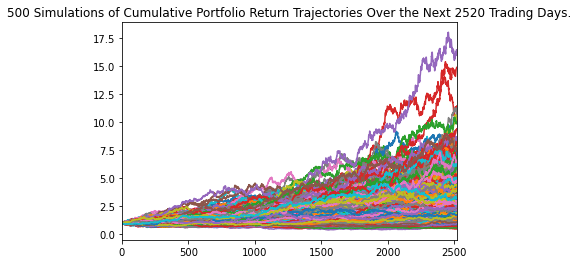

In [94]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_sim_line_plot = MC_10year.plot_simulation()
MC_sim_line_plot.get_figure().savefig("MC_10year_sim_plot.png", bbox_inches="tight")


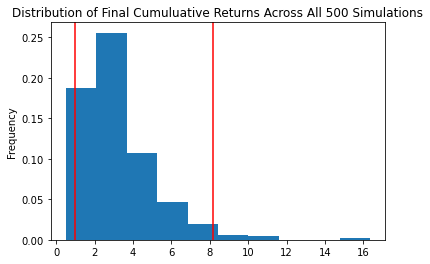

In [95]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
MC_sim_dist_plot = MC_10year.plot_distribution()
MC_sim_dist_plot.get_figure().savefig('MC_10year_dist_plot.png',bbox_inches='tight')

In [103]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
MC_summary_statistics = MC_10year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
print(MC_summary_statistics)

count           500.000000
mean              3.225413
std               1.972203
min               0.486256
25%               1.904477
50%               2.757182
75%               3.967496
max              16.364026
95% CI Lower      0.975011
95% CI Upper      8.152284
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [97]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
total_stocks_bonds

69614.58571428573

In [104]:
ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * total_stocks_bonds

# Print the result of your calculations
# YOUR CODE HERE
print(f"There is a 95% chance that an initial investment of {total_stocks_bonds} in the portfolio"
    f" over the next 10 years will end within in the range of"
    f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")

# Print the result of your calculations
# YOUR CODE HERE


There is a 95% chance that an initial investment of 69614.58571428573 in the portfolio over the next 10 years will end within in the range of $ 67875.00 and $ 567517.90.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?